In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
boston = load_boston()
boston.data.shape

C:\Users\yasho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)

In [8]:
feature_num = 7
boston = load_boston()
X = boston.data[:,:feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns= features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [9]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [11]:
# split into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [15]:
# loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [   10   100  1000 10000]


In [16]:
alphas

array([   10,   100,  1000, 10000], dtype=int32)

In [17]:
ridge_weight

[array([-1.49246448,  0.37088936, -0.70836731,  1.08568161, -0.80970633,
         4.4075122 , -0.80450999]),
 array([-1.30486468,  0.5170331 , -0.85951603,  0.96594376, -0.81006847,
         3.54696735, -0.74796938]),
 array([-0.6486645 ,  0.4993468 , -0.67576213,  0.39800779, -0.61503278,
         1.33852138, -0.56022566]),
 array([-0.11842591,  0.11262874, -0.1443168 ,  0.05431575, -0.13553009,
         0.20563081, -0.12574102])]

In [21]:
def weight_versus_alpha_plot(weight, alphas, fratures):
    """Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient 
    weight for different alpha values
    """
    
    fig = plt.figure(figsize=(8,6))
    
    # the weight should be array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:,col], label = features[col])
        
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # specify the coordinates
    plt.legend(bbox_to_anchor = (1.3,0.9))
    plt.title('Coefficient weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

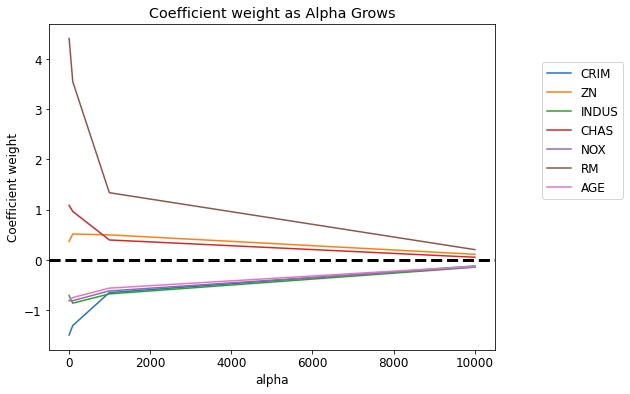

In [22]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


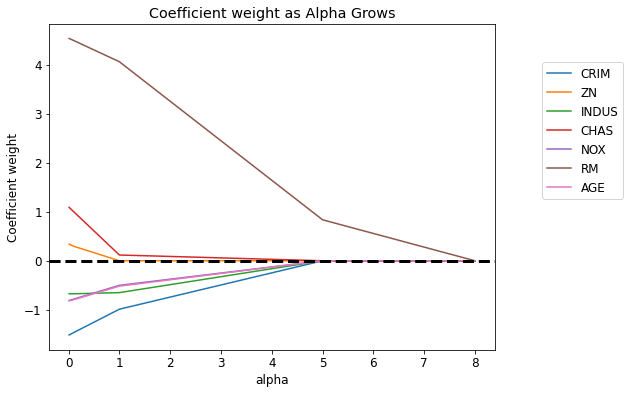

In [25]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)    